**Table of contents**<a id='toc0_'></a>    
- [Data Processing](#toc1_)    
  - [Imports of the Entire File](#toc1_1_)    
  - [Load File into Dataset](#toc1_2_)    
  - [Cleaning and Modifying Dataframw](#toc1_3_)    
- [Model Development](#toc2_)    
  - [Splitting Training and test sets for the models](#toc2_1_)    
  - [Random Forest Regressor](#toc2_2_)    
    - [Difference between the predicted value and the actual value](#toc2_2_1_)    
    - [Metric Evaluation](#toc2_2_2_)    
    - [Metric Visualization](#toc2_2_3_)    
  - [Gradient Boosting Regressor](#toc2_3_)    
    - [Difference between the predicted value and the actual value](#toc2_3_1_)    
    - [Metric Evaluation](#toc2_3_2_)    
    - [Metric Visualization](#toc2_3_3_)    
  - [Linear Regression](#toc2_4_)    
    - [Metric Evaluation](#toc2_4_1_)    
    - [Metric Visualization](#toc2_4_2_)    
  - [K Nearest Neighbours](#toc2_5_)    
- [Dataset Visualization](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Processing](#toc0_)

## <a id='toc1_1_'></a>[Imports of the Entire File](#toc0_)

In [37]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc1_2_'></a>[Load File into Dataset](#toc0_)

In [2]:
df = pd.read_csv("../Data/downforce_data.csv")


## <a id='toc1_3_'></a>[Cleaning and Modifying Dataframw](#toc0_)

In [3]:
le = LabelEncoder()

df['CarType'] = le.fit_transform(df['car_type'])
df = df.drop('car_type', axis=1)
# df = df.set_index('CarType')



In [4]:
X = df.drop(columns=['downforce'])
y = df['downforce']




# <a id='toc2_'></a>[Model Development](#toc0_)

## <a id='toc2_1_'></a>[Splitting Training and test sets for the models](#toc0_)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 5) (400, 5) (1600,) (400,)


## <a id='toc2_2_'></a>[Random Forest Regressor](#toc0_)

In [7]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=58, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=58)

In [8]:
y_pred_rf = rf_model.predict(X_test)

### <a id='toc2_2_1_'></a>[Difference between the predicted value and the actual value](#toc0_)

In [9]:
metric_rf = pd.DataFrame()
metric_rf['Actual'] = y_test
metric_rf['Predicted'] = y_pred_rf.round(2)
metric_rf['Difference'] = abs(metric_rf["Actual"] - metric_rf['Predicted'])

metric_rf


,Actual,Predicted,Difference
1338,10.27,10.27,0.00
577,204.30,203.99,0.31
1499,70.81,70.76,0.05
6,91.04,91.10,0.06
463,70.60,70.63,0.03
...,...,...,...
373,50.30,50.38,0.08
1054,160.36,160.43,0.07
1055,70.53,70.52,0.01
1619,20.08,20.08,0.00


### <a id='toc2_2_2_'></a>[Metric Evaluation](#toc0_)

In [10]:
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
# accuracy = accuracy_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.3177250898187198
R^2 Score: 0.999938080439805


In [11]:
y_val_rounded = np.round(y_test)
y_pred_rounded = np.round(y_pred_rf)

# Use accuracy_score on the rounded values
accuracy = accuracy_score(y_val_rounded, y_pred_rounded)

accuracy

0.7775

### <a id='toc2_2_3_'></a>[Metric Visualization](#toc0_)

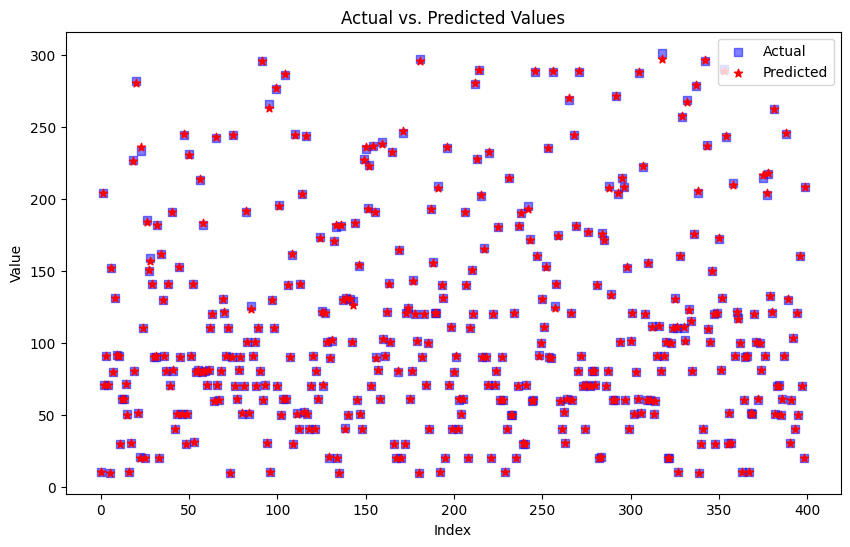

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual', marker='s')

plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='red', alpha=1, label='Predicted', marker="*")

plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## <a id='toc2_3_'></a>[Gradient Boosting Regressor](#toc0_)


In [13]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=54)

gb_model.fit(X_train, y_train)



GradientBoostingRegressor(max_depth=6, n_estimators=200, random_state=54)

In [14]:
y_pred_gb = gb_model.predict(X_test)

### <a id='toc2_3_1_'></a>[Difference between the predicted value and the actual value](#toc0_)

In [15]:
metric_gb = pd.DataFrame()
metric_gb['Actual'] = y_test
metric_gb['Predicted'] = y_pred_gb.round(2)
metric_gb['Difference'] = abs(metric_gb["Actual"] - metric_gb['Predicted'])

metric_gb


,Actual,Predicted,Difference
1338,10.27,10.27,0.00
577,204.30,203.80,0.50
1499,70.81,70.72,0.09
6,91.04,91.08,0.04
463,70.60,70.57,0.03
...,...,...,...
373,50.30,50.32,0.02
1054,160.36,160.39,0.03
1055,70.53,70.57,0.04
1619,20.08,20.07,0.01


### <a id='toc2_3_2_'></a>[Metric Evaluation](#toc0_)

In [16]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Step 8: Print the results
print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")

Mean Squared Error: 0.2274199784237056
R^2 Score: 0.9999556794678961


In [17]:
y_val_rounded = np.round(y_test)
y_pred_rounded = np.round(y_pred_gb)

# Use accuracy_score on the rounded values
accuracy = accuracy_score(y_val_rounded, y_pred_rounded)

accuracy

0.8075

### <a id='toc2_3_3_'></a>[Metric Visualization](#toc0_)

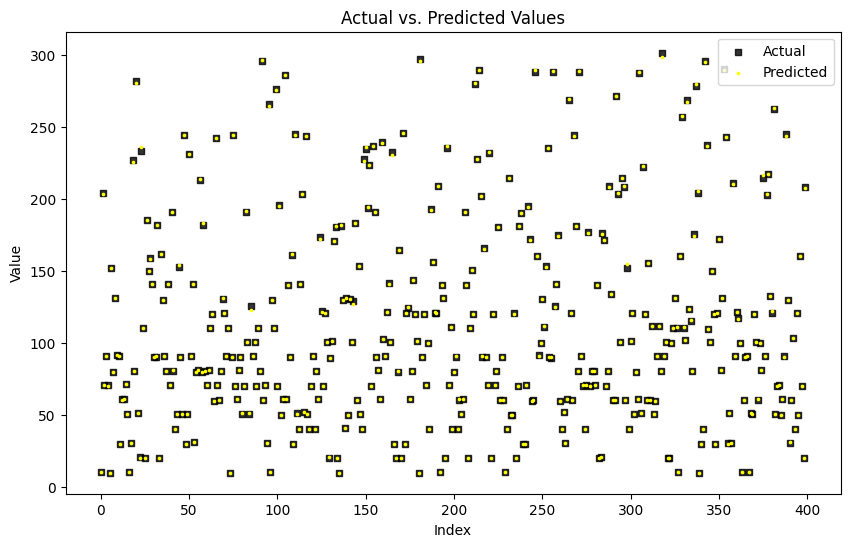

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(range(len(y_test)), y_test, color='black', alpha=0.8, label='Actual', marker='s', s=25)

plt.scatter(range(len(y_pred_gb)), y_pred_gb, color='yellow', alpha=1, label='Predicted', marker=".", s=10)

plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## <a id='toc2_4_'></a>[Linear Regression](#toc0_)

In [30]:
lr = LinearRegression()

param_grid = {'fit_intercept': [True, False],
              'n_jobs': [0, 100]}

grid_search = GridSearchCV(lr, param_grid, cv=3)
grid_search.fit(X_train, y_train) 


GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [0, 100]})

In [31]:
y_pred_lr = grid_search.predict(X_test)

### <a id='toc2_3_1_'></a>[Difference between the predicted value and the actual value](#toc0_)

In [32]:
metric_lr = pd.DataFrame()
metric_lr['Actual'] = y_test
metric_lr['Predicted'] = y_pred_lr.round(2)
metric_lr['Difference'] = abs(metric_lr["Actual"] - metric_lr['Predicted'])

metric_lr

,Actual,Predicted,Difference
1338,10.27,9.59,0.68
577,204.30,205.27,0.97
1499,70.81,71.01,0.20
6,91.04,91.23,0.19
463,70.60,70.47,0.13
...,...,...,...
373,50.30,49.67,0.63
1054,160.36,159.74,0.62
1055,70.53,70.25,0.28
1619,20.08,19.21,0.87


### <a id='toc2_4_1_'></a>[Metric Evaluation](#toc0_)

In [33]:
mse_lr= mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Step 8: Print the results
print(f"Mean Squared Error: {mse_lr}")
print(f"R^2 Score: {r2_lr}")

Mean Squared Error: 0.6962076188610717
R^2 Score: 0.9998643202222751


### <a id='toc2_4_2_'></a>[Metric Visualization](#toc0_)

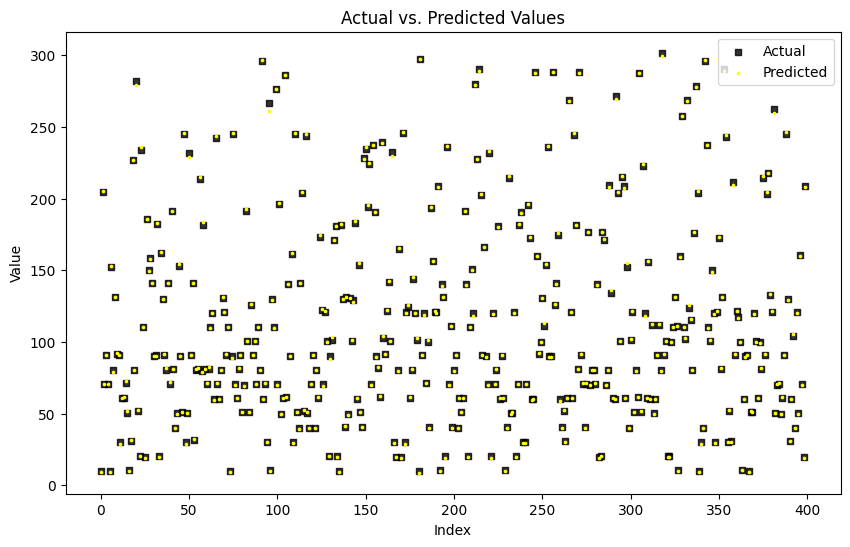

In [34]:
plt.figure(figsize=(10,6))

plt.scatter(range(len(y_test)), y_test, color='black', alpha=0.8, label='Actual', marker='s', s=25)

plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='yellow', alpha=1, label='Predicted', marker=".", s=10)

plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## <a id='toc2_5_'></a>[K Nearest Neighbours](#toc0_)

In [109]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=1, metric='minkowski', algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsRegressor(p=1, weights='distance')

In [110]:
y_pred_knn = knn.predict(X_test)

In [111]:
metric_knn = pd.DataFrame()
metric_knn['Actual'] = y_test
metric_knn['Predicted'] = y_pred_knn.round(2)
metric_knn['Difference'] = abs(metric_knn["Actual"] - metric_knn['Predicted'])

metric_knn

,Actual,Predicted,Difference
1338,10.27,17.96,7.69
577,204.30,202.33,1.97
1499,70.81,62.68,8.13
6,91.04,106.06,15.02
463,70.60,69.27,1.33
...,...,...,...
373,50.30,43.84,6.46
1054,160.36,168.06,7.70
1055,70.53,68.39,2.14
1619,20.08,22.29,2.21


In [112]:
mse_knn= mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Step 8: Print the results
print(f"Mean Squared Error: {mse_knn}")
print(f"R^2 Score: {r2_knn}")

Mean Squared Error: 308.1143569306653
R^2 Score: 0.9399534185928778


# <a id='toc3_'></a>[Dataset Visualization](#toc0_)


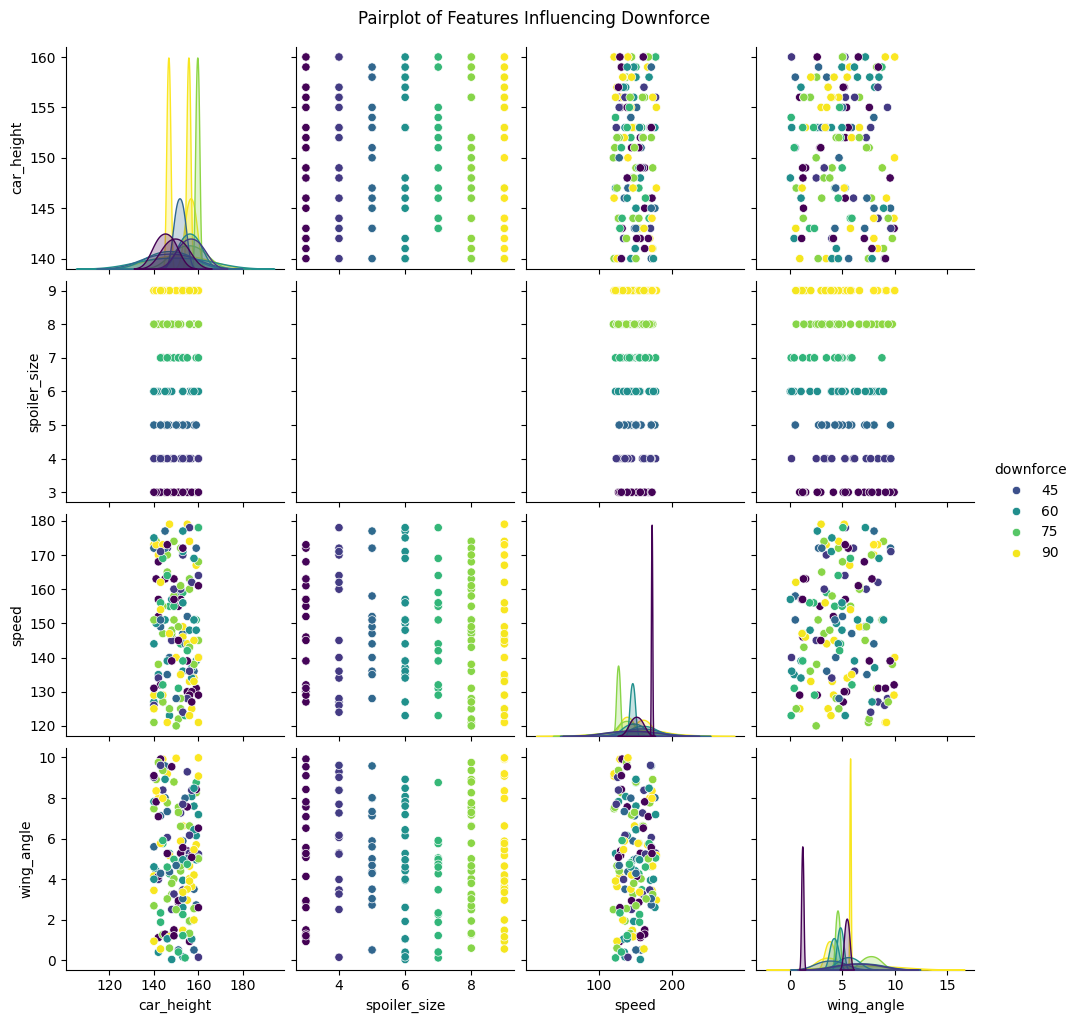

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter data for CarType == 1
df_filtered = df[df['CarType'] == 0]

# Step 2: Plot pairplot
sns.pairplot(df_filtered[['car_height', 'spoiler_size', 'speed', 'wing_angle', 'downforce']], 
             kind='scatter', hue='downforce', palette='viridis')
plt.suptitle('Pairplot of Features Influencing Downforce', y=1.02)
plt.show()
